In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pickle

class Data:
    def __init__(self):
        # Assign commonly used libraries and functions as class attributes for convenience
        self.pd = pd                         # Pandas for data manipulation and analysis
        self.plt = plt                       # Matplotlib for plotting graphs
        self.sns = sns                       # Seaborn for statistical data visualization
        self.train_test_split = train_test_split  # Scikit-learn function to split data into training and test sets
        self.StandardScaler = StandardScaler      # Scikit-learn class for feature scaling
        self.LabelEncoder = LabelEncoder          # Scikit-learn class for encoding categorical labels
        self.SVR = SVR                             # Support Vector Regression model from scikit-learn
        self.mean_squared_error = mean_squared_error  # Function to evaluate model performance (MSE)
        self.r2_score = r2_score                    # Function to evaluate model performance (R² score)
        self.pickle = pickle                        # Python module for serializing and saving models


Data Preprocessing: 
The DataPreprocessing class prepares raw data for machine learning by handling missingvalues, encoding categorical features, and scaling numerical data.

In [57]:
class DataPreprocessing(Data):
    """
    DataPreprocessing Class

    Overview:
        This class extends the base Data class and provides essential preprocessing functionalities
        for handling CSV data in a machine learning pipeline. It includes methods to load data,
        rename columns, inspect the dataset, handle missing values, and perform basic statistical analysis.

    Purpose:
        To clean, explore, and prepare a dataset for machine learning by automating repetitive tasks
        like renaming columns, checking nulls, displaying stats, and handling missing values.
    """

    def __init__(self, file_path):
        super().__init__()  # Inherit methods and tools from the Data class
        self.file_path = file_path  # Store the file path
        self.df = None  # DataFrame placeholder
        self.scaler = self.StandardScaler()  # Initialize StandardScaler for later use
        if file_path:
            self.read_data(file_path)  # Automatically load data if file_path is provided

    def read_data(self, file_path):
        """Reads CSV file from the given path and loads it into a DataFrame."""
        self.file_path = file_path  # Save the file path
        self.df = self.pd.read_csv(file_path)  # Load data using pandas
        print("Data loaded successfully from:", file_path)

    def rename_columns(self):
        """Renames long or inconsistent column names for better readability."""
        self.df.rename(columns={
            "Student_ID": "Std_ID",
            "Study_Hours_Per_Day": "Stu_Hours",
            "Extracurricular_Hours_Per_Day": "Extra_Hours",
            "Sleep_Hours_Per_Day": "Sleep_Hours",
            "Physical_Activity_Hours_Per_Day": "Physical_Hours"
        }, inplace=True)  # Rename columns in place
        print("Columns renamed successfully.")
        print("New columns:", self.df.columns.tolist())

    def show_columns(self):
        """Displays the list of column names in the dataset."""
        df_copy = self.df.copy()  # Work on a copy to preserve original
        print("Dataset Columns:", df_copy.columns.tolist())  # Print column names

    def show_shape(self):
        """Prints the shape of the dataset (rows, columns)."""
        df_copy = self.df.copy()
        print("Dataset Shape:", df_copy.shape)  # Print number of rows and columns

    def show_info(self):
        """Displays information about dataset columns, data types, and memory usage."""
        df_copy = self.df.copy()
        print("Dataset Info:")
        print(df_copy.info())  # Show info including non-null counts, dtypes, memory usage

    def describe_data(self):
        """Prints descriptive statistics for all columns, including categorical ones."""
        df_copy = self.df.copy()
        print("Descriptive Statistics:")
        print(df_copy.describe(include="all"))  # Summary of stats (mean, std, count, etc.)

    def show_min_max(self):
        """Prints minimum and maximum values for each numeric column."""
        df_copy = self.df.copy()
        desc = df_copy.describe()  # Get descriptive stats
        print("Minimum values:\n", desc.loc["min"])  # Print min values
        print("Maximum values:\n", desc.loc["max"])  # Print max values

    def show_mean_mode_median(self, column="Grades"):
        """
        Displays mean, mode, and median for a specified column.

        Parameters:
            column (str): Column name to compute statistics for. Default is 'Grades'.
        """
        df_copy = self.df.copy()
        print(f"Statistics for '{column}':")
        print("Mean:", df_copy[column].mean())  # Compute and print mean
        print("Mode:", df_copy[column].mode()[0])  # Compute and print first mode value
        print("Median:", df_copy[column].median())  # Compute and print median

    def check_nulls(self):
        """Displays the number of missing values in each column."""
        df_copy = self.df.copy()
        print("Null value summary:\n", df_copy.isnull().sum())  # Count nulls per column

    def handle_missing_values(self, strategy="drop"):
        """
        Handles missing values in the dataset.

        Parameters:
            strategy (str): 'drop' to remove rows with missing values,
                            'fill' to fill with column means (numeric only).
        """
        if strategy == "drop":
            self.df.dropna(inplace=True)  # Drop rows with any nulls
            print("Missing values dropped.")
        elif strategy == "fill":
            # Fill only numeric columns with their mean values
            self.df.fillna(self.df.mean(numeric_only=True), inplace=True)
            print("Missing values filled with column means.")

    def basic_data_load(self, numbers=5, mode="head"):
        """
        Displays a sample of the dataset.

        Parameters:
            numbers (int): Number of rows to display.
            mode (str): 'head', 'tail', or 'sample' to specify which part of the dataset to show.
        """
        mode = mode.lower().strip()  # Normalize input
        df_copy = self.df.copy()
        if mode == "head":
            print(f"First {numbers} rows:")
            print(df_copy.head(numbers))  # Show first N rows
        elif mode == "tail":
            print(f"Last {numbers} rows:")
            print(df_copy.tail(numbers))  # Show last N rows
        elif mode == "sample":
            print(f"Random {numbers} rows:")
            print(df_copy.sample(numbers))  # Show random N rows
        else:
            print("Invalid mode! Please choose 'head', 'tail', or 'sample'.")


In [58]:
# Create an instance of DataPreprocessing class with the CSV file path
data_processor = DataPreprocessing("data.csv")

# 1. Rename columns to standardized names (modifies the internal df in-place)
data_processor.rename_columns()

# 2. Display all column names of the dataset
data_processor.show_columns()

# 3. Display the shape (rows, columns) of the dataset
data_processor.show_shape()

# 4. Display detailed information about dataset columns and data types
data_processor.show_info()

# 5. Show descriptive statistics including count, mean, std, min, max, etc.
data_processor.describe_data()

# 6. Display the minimum and maximum values for each numeric column
data_processor.show_min_max()

# 7. Show mean, mode, and median statistics specifically for the 'Grades' column
data_processor.show_mean_mode_median(column="Grades")

# 8. Check the dataset for any null or missing values per column
data_processor.check_nulls()

# 9. Handle missing values based on strategy:
#    "drop" — remove rows with missing values
#    "fill" — fill missing values with the column mean (numeric columns only)
data_processor.handle_missing_values(strategy="drop")  # or strategy="fill"

# 10. Show the first 5 rows of the dataset (default behavior)
data_processor.basic_data_load()  # numbers=5, mode='head' by default

# 11. Show the last 10 rows of the dataset
data_processor.basic_data_load(numbers=10, mode="tail")

# 12. Show a random sample of 7 rows from the dataset
data_processor.basic_data_load(numbers=7, mode="sample")


Data loaded successfully from: data.csv
Columns renamed successfully.
New columns: ['Std_ID', 'Stu_Hours', 'Extra_Hours', 'Sleep_Hours', 'Social_Hours_Per_Day', 'Physical_Hours', 'Stress_Level', 'Gender', 'Grades']
Dataset Columns: ['Std_ID', 'Stu_Hours', 'Extra_Hours', 'Sleep_Hours', 'Social_Hours_Per_Day', 'Physical_Hours', 'Stress_Level', 'Gender', 'Grades']
Dataset Shape: (149, 9)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Std_ID                149 non-null    int64  
 1   Stu_Hours             149 non-null    float64
 2   Extra_Hours           149 non-null    float64
 3   Sleep_Hours           149 non-null    float64
 4   Social_Hours_Per_Day  149 non-null    float64
 5   Physical_Hours        149 non-null    float64
 6   Stress_Level          149 non-null    object 
 7   Gender                149 non-

In [59]:
class Graphs(DataPreprocessing):
    """
    Graphs Class

    Overview:
        This class extends the DataPreprocessing class and provides various methods
        for visualizing data using matplotlib and seaborn.

    Purpose:
        To create different types of plots that help understand the distribution, relationships,
        and structure of the dataset for effective analysis.
    """

    def __init__(self, file_path):
        super().__init__(file_path)  # Inherit file loading and preprocessing methods

    def plot_histogram(self, column, bins=10):
        """Plots a histogram with optional KDE for a specified column."""
        self.plt.figure(figsize=(8, 5))  # Set figure size
        self.sns.histplot(self.df[column], bins=bins, kde=True)  # Plot histogram
        self.plt.title(f'Histogram of {column}')  # Title
        self.plt.show()  # Display the plot

    def plot_boxplot(self, column):
        """Plots a boxplot for a specified column to detect outliers and spread."""
        self.plt.figure(figsize=(8, 5))
        self.sns.boxplot(y=self.df[column])  # Boxplot vertically
        self.plt.title(f'Boxplot of {column}')
        self.plt.show()

    def plot_scatter(self, x_col, y_col):
        """Plots a scatter plot to show the relationship between two variables."""
        self.plt.figure(figsize=(8, 5))
        self.sns.scatterplot(x=self.df[x_col], y=self.df[y_col])  # Scatter plot with x and y
        self.plt.title(f'Scatter: {x_col} vs {y_col}')
        self.plt.show()

    def plot_correlation_heatmap(self):
        """Plots a heatmap showing correlations between numeric columns."""
        self.plt.figure(figsize=(10, 8))
        corr = self.df.corr(numeric_only=True)  # Compute correlation matrix
        self.sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # Annotated heatmap
        self.plt.title('Correlation Heatmap')
        self.plt.show()

    def plot_bar(self, column):
        """Plots a count-based bar plot for a categorical column."""
        self.plt.figure(figsize=(8, 5))
        self.sns.countplot(x=self.df[column])  # Bar chart using category counts
        self.plt.title(f'Bar Plot of {column}')
        self.plt.show()

    def plot_line(self, x_col, y_col):
        """Plots a line plot to show trend between two columns (typically over time or order)."""
        self.plt.figure(figsize=(8, 5))
        self.sns.lineplot(x=self.df[x_col], y=self.df[y_col])  # Line plot
        self.plt.title(f'Line Plot: {x_col} vs {y_col}')
        self.plt.show()

    def plot_pie(self, column):
        """Plots a pie chart showing proportion of categories in a column."""
        self.plt.figure(figsize=(7, 7))
        data = self.df[column].value_counts()  # Count each category
        self.plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)  # Pie chart
        self.plt.title(f'Pie Chart of {column}')
        self.plt.axis('equal')  # Make the pie circular
        self.plt.show()

    def plot_pairplot(self, columns=None):
        """
        Plots a pairplot for selected columns or the entire DataFrame.
        Useful for exploring pairwise relationships and distributions.
        """
        if columns:
            self.sns.pairplot(self.df[columns])  # Pairplot of selected columns
        else:
            self.sns.pairplot(self.df)  # Entire dataset
        self.plt.suptitle('Pairplot', y=1.02)  # Slightly move title upward
        self.plt.show()

    def plot_kde(self, column):
        """Plots a Kernel Density Estimate (KDE) curve for a column."""
        self.plt.figure(figsize=(8, 5))
        self.sns.kdeplot(self.df[column], shade=True)  # KDE with shaded area
        self.plt.title(f'KDE Plot of {column}')
        self.plt.show()


Data loaded successfully from: data.csv
Columns renamed successfully.
New columns: ['Std_ID', 'Stu_Hours', 'Extra_Hours', 'Sleep_Hours', 'Social_Hours_Per_Day', 'Physical_Hours', 'Stress_Level', 'Gender', 'Grades']
Dataset Columns: ['Std_ID', 'Stu_Hours', 'Extra_Hours', 'Sleep_Hours', 'Social_Hours_Per_Day', 'Physical_Hours', 'Stress_Level', 'Gender', 'Grades']


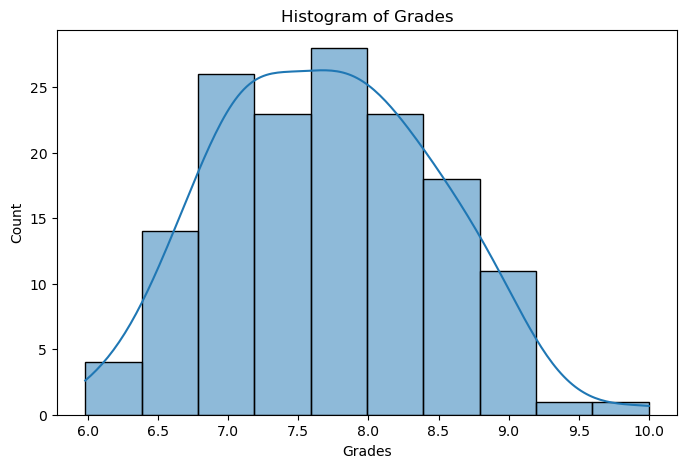

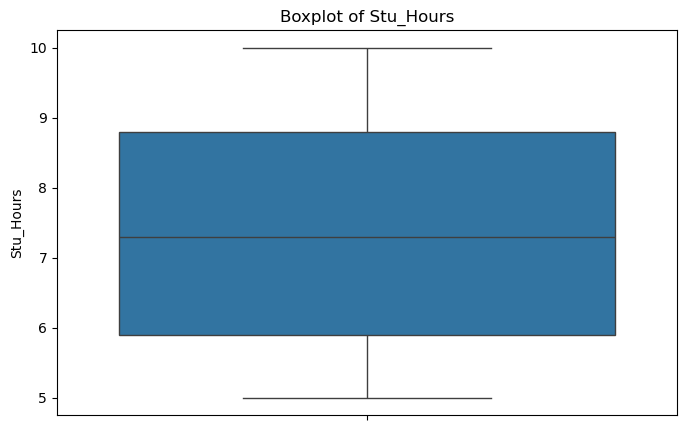

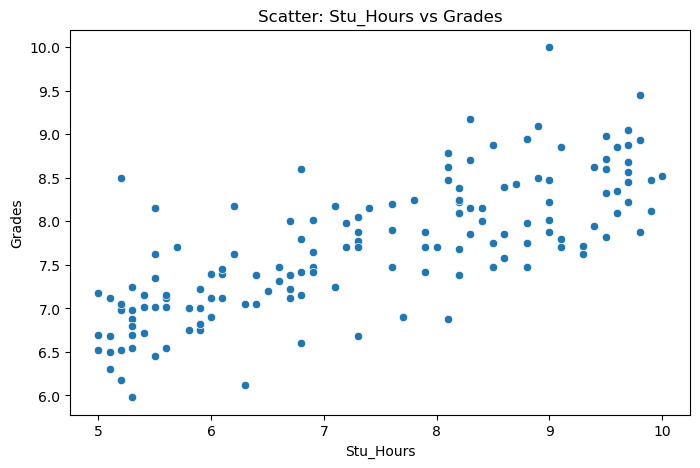

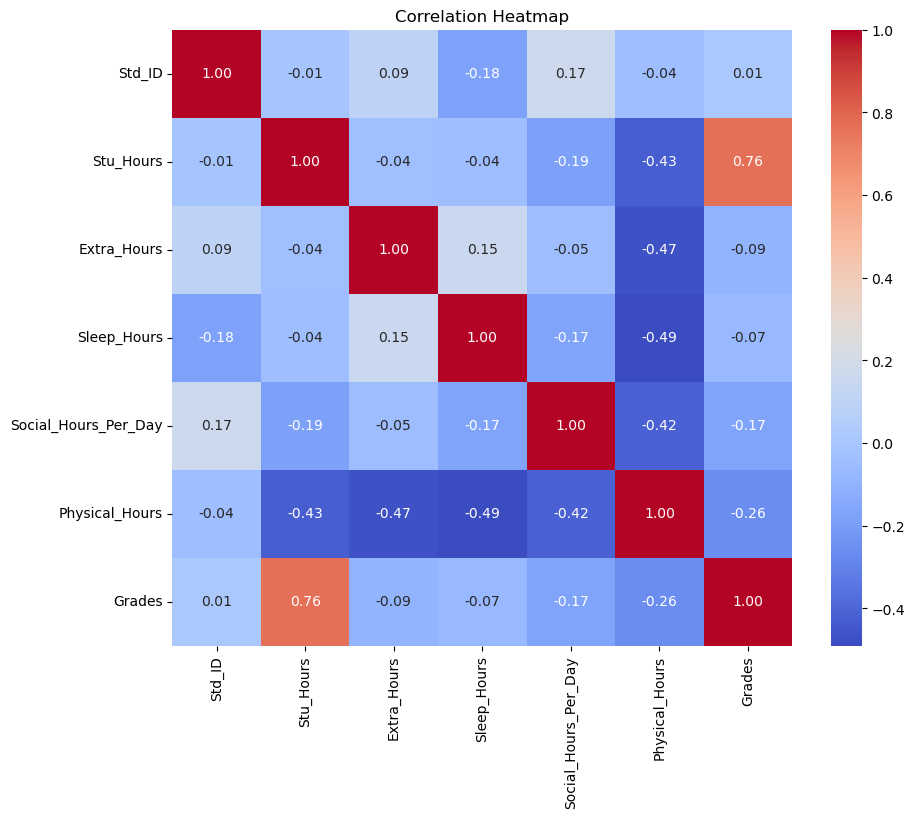

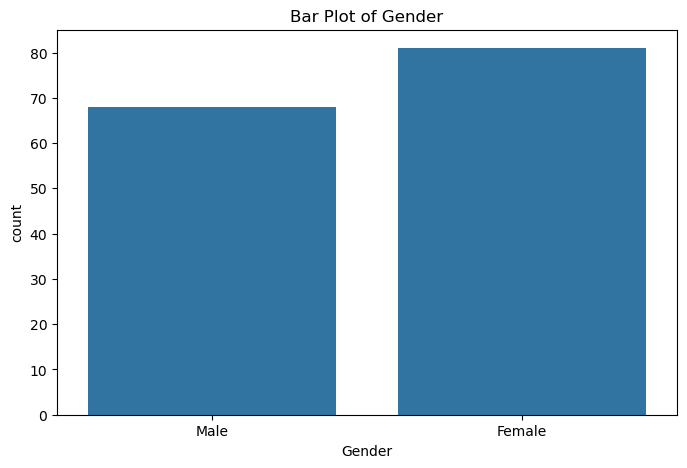

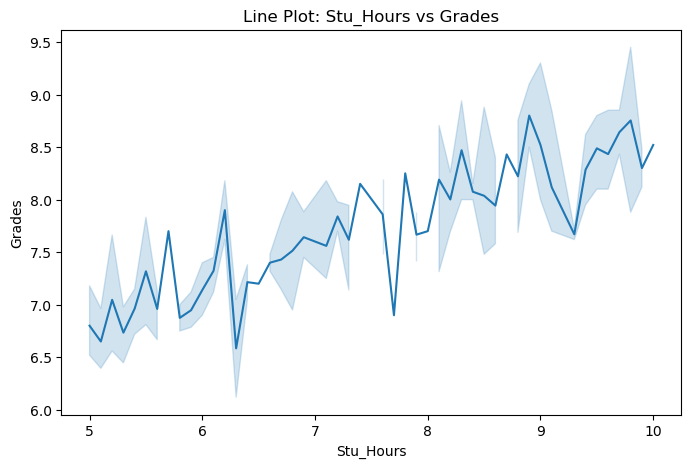

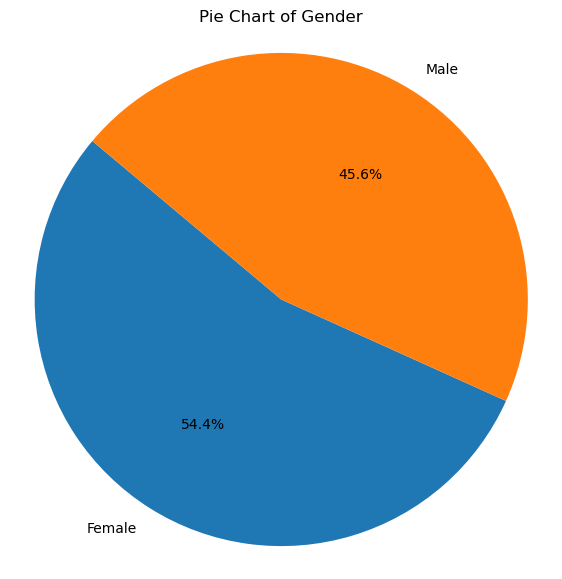

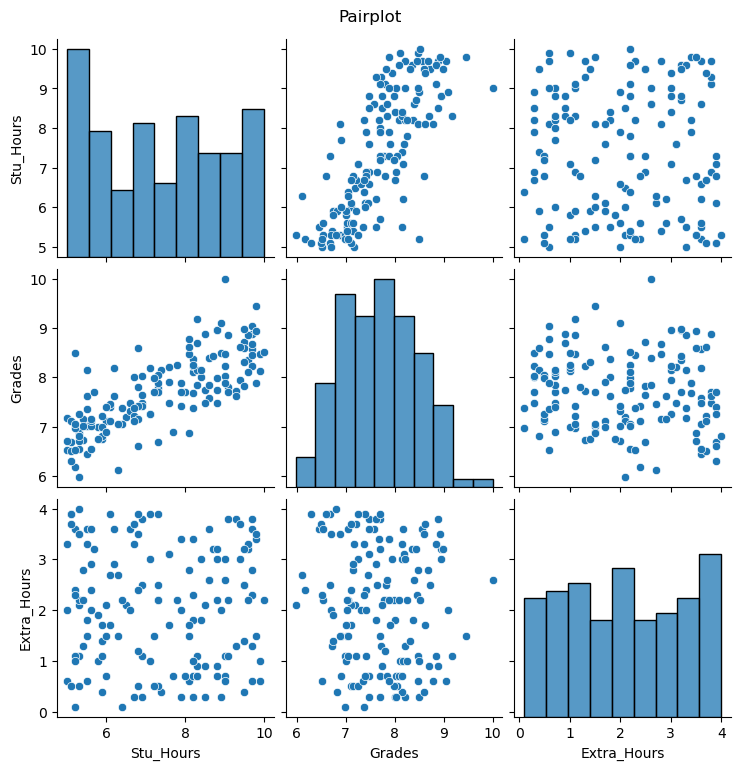

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10724\372231424.py:84: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  self.sns.kdeplot(self.df[column], shade=True)  # KDE with shaded area


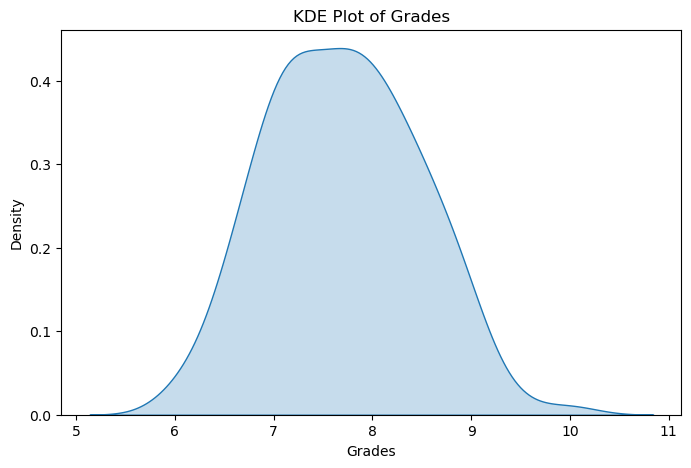

In [60]:
# Create an instance of the Graphs class and load the dataset from "data.csv"
graph_obj = Graphs("data.csv")

# Step 1: Rename columns to shorter or more standardized names for easier access in code
graph_obj.rename_columns()  

# Step 2 (Optional): Display the current column names after renaming
graph_obj.show_columns()

# Step 3: Call various plotting methods to visualize data

# Plot a histogram for the 'Grades' column to observe distribution and density
graph_obj.plot_histogram("Grades")

# Plot a boxplot for 'Stu_Hours' to detect outliers and see data spread
graph_obj.plot_boxplot("Stu_Hours")

# Plot a scatter plot to examine the relationship between 'Stu_Hours' and 'Grades'
graph_obj.plot_scatter("Stu_Hours", "Grades")

# Plot a heatmap showing the correlation between all numeric variables
graph_obj.plot_correlation_heatmap()

# Plot a bar chart of the 'Gender' column to count the number of males/females
graph_obj.plot_bar("Gender")

# Plot a line graph showing how 'Grades' change with 'Stu_Hours'
graph_obj.plot_line("Stu_Hours", "Grades")

# Plot a pie chart showing percentage distribution of genders
graph_obj.plot_pie("Gender")

# Plot a pairplot to visualize relationships and distributions among selected columns
graph_obj.plot_pairplot(columns=["Stu_Hours", "Grades", "Extra_Hours"])

# Plot a Kernel Density Estimate (KDE) for 'Grades' to see the smoothed distribution
graph_obj.plot_kde("Grades")


In [61]:
class Bivariate(Graphs):
    """
    Bivariate Class

    Overview:
        This class inherits from the Graphs class and focuses specifically on
        bivariate analysis—studying relationships between two variables.

    Purpose:
        To encapsulate and organize visualizations that help understand correlations,
        trends, and interactions between pairs of features.

    Parameters:
        file_path (str): The path to the CSV file to be loaded and analyzed.
    """

    def __init__(self, file_path):
        # Inherit data loading, preprocessing, and graphing functionalities
        super().__init__(file_path)

    def plot_scatter(self, x_col, y_col):
        """
        Plots a scatter plot to examine the relationship between two numeric variables.

        Parameters:
            x_col (str): Column name for x-axis.
            y_col (str): Column name for y-axis.
        """
        super().plot_scatter(x_col, y_col)  # Call the inherited method

    def plot_correlation_heatmap(self):
        """
        Plots a heatmap to show correlations between all numeric features.
        Helps identify which variables are strongly or weakly related.
        """
        super().plot_correlation_heatmap()  # Call the inherited method

    def plot_line(self, x_col, y_col):
        """
        Plots a line graph to visualize trends between two variables.

        Parameters:
            x_col (str): Column name for x-axis.
            y_col (str): Column name for y-axis.
        """
        super().plot_line(x_col, y_col)  # Call the inherited method

    def plot_pairplot(self, columns=None):
        """
        Plots pairwise relationships in the dataset, optionally restricted to specific columns.

        Parameters:
            columns (list[str], optional): List of columns to include in the pairplot.
        """
        super().plot_pairplot(columns)  # Call the inherited method


Data loaded successfully from: data.csv
Columns renamed successfully.
New columns: ['Std_ID', 'Stu_Hours', 'Extra_Hours', 'Sleep_Hours', 'Social_Hours_Per_Day', 'Physical_Hours', 'Stress_Level', 'Gender', 'Grades']


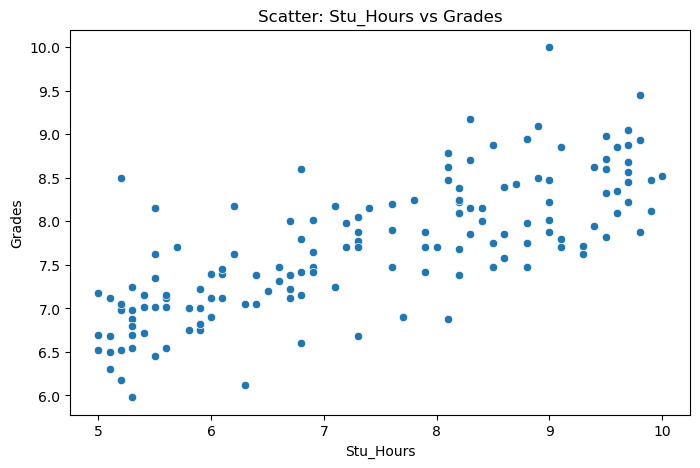

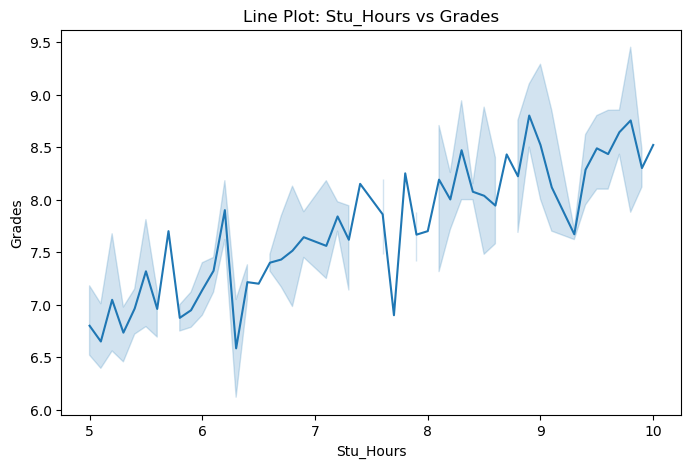

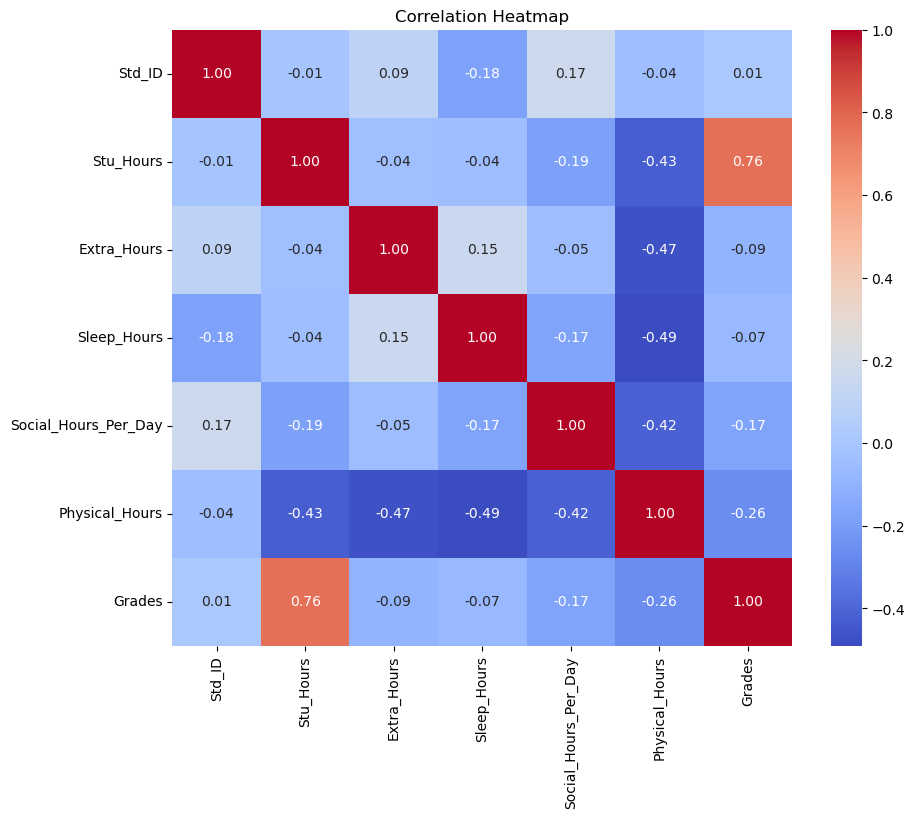

In [62]:
# Create an instance of the Bivariate class and load data from "data.csv"
bivariate_obj = Bivariate("data.csv")

# Rename columns for standardized, shorter names for easier access in code
bivariate_obj.rename_columns()

# Call bivariate plot methods inherited from Graphs class

# Plot a scatter plot to visualize the relationship between Study Hours and Grades
bivariate_obj.plot_scatter("Stu_Hours", "Grades")

# Plot a line plot to observe trends between Study Hours and Grades
bivariate_obj.plot_line("Stu_Hours", "Grades")

# Plot a correlation heatmap to see correlation coefficients between numeric features
bivariate_obj.plot_correlation_heatmap()


In [63]:
class Univariate(Graphs):
    """
    Univariate Class

    Overview:
        This class inherits from the Graphs class and focuses specifically on 
        univariate analysis—examining the distribution and characteristics of individual variables.

    Purpose:
        To organize and provide methods for visualizing single variables to understand
        their distribution, spread, and composition.

    Parameters:
        file_path (str): Path to the CSV file to load the dataset.
    """

    def __init__(self, file_path):
        # Initialize and load data by calling parent constructor
        super().__init__(file_path)

    def plot_histogram(self, column, bins=10):
        """
        Plot a histogram with KDE for a single column to observe frequency distribution.

        Parameters:
            column (str): Name of the column to plot.
            bins (int): Number of bins in the histogram (default is 10).
        """
        super().plot_histogram(column, bins)

    def plot_boxplot(self, column):
        """
        Plot a boxplot to visualize the spread, median, and potential outliers of a column.

        Parameters:
            column (str): Name of the column to plot.
        """
        super().plot_boxplot(column)

    def plot_pie(self, column):
        """
        Plot a pie chart to show the proportion of categories in a categorical column.

        Parameters:
            column (str): Name of the categorical column.
        """
        super().plot_pie(column)

    def plot_kde(self, column):
        """
        Plot a Kernel Density Estimate (KDE) to visualize the smoothed distribution of a numeric column.

        Parameters:
            column (str): Name of the column to plot.
        """
        super().plot_kde(column)


Data loaded successfully from: data.csv
Columns renamed successfully.
New columns: ['Std_ID', 'Stu_Hours', 'Extra_Hours', 'Sleep_Hours', 'Social_Hours_Per_Day', 'Physical_Hours', 'Stress_Level', 'Gender', 'Grades']


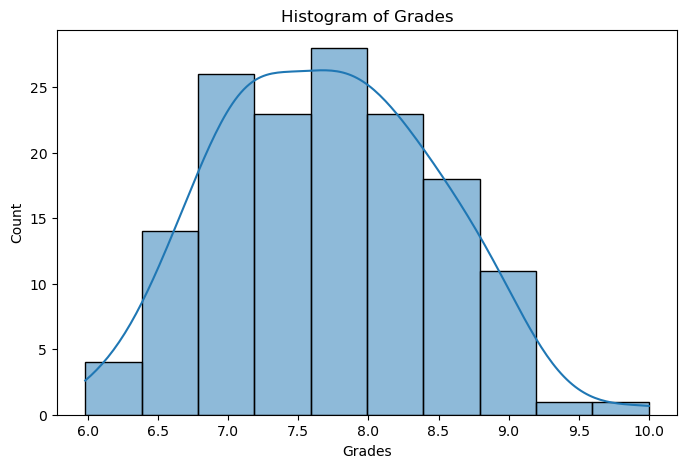

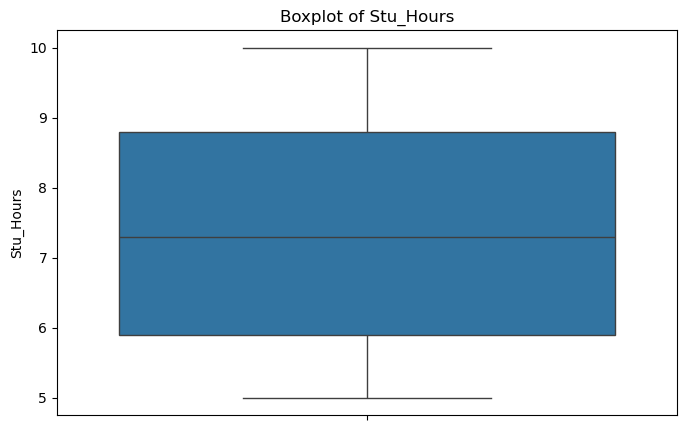

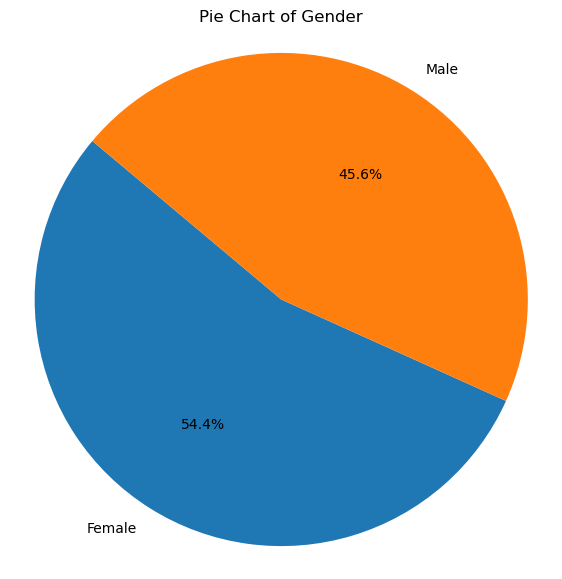

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10724\372231424.py:84: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  self.sns.kdeplot(self.df[column], shade=True)  # KDE with shaded area


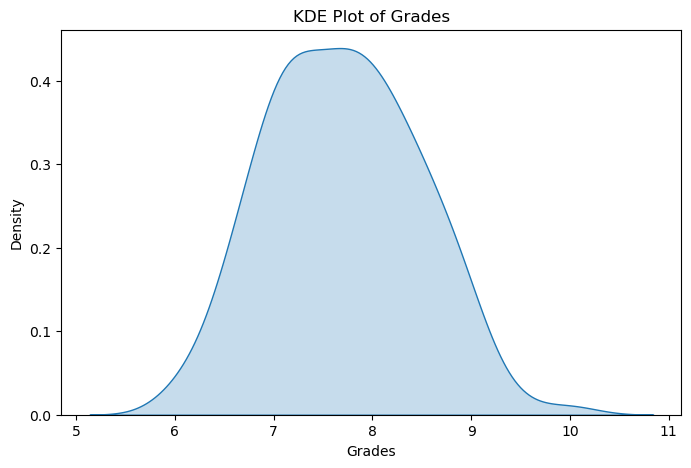

In [64]:
# Create an instance of the Univariate class and load data from "data.csv"
uni_obj = Univariate("data.csv")

# Rename columns to standardized shorter names to avoid issues with long/complex names
uni_obj.rename_columns()

# Call univariate plotting methods on renamed columns

# Plot histogram with KDE to visualize distribution of 'Grades'
uni_obj.plot_histogram("Grades")

# Plot boxplot to check spread and detect outliers in 'Stu_Hours'
uni_obj.plot_boxplot("Stu_Hours")

# Plot pie chart to show proportion of categories in 'Gender'
uni_obj.plot_pie("Gender")

# Plot KDE to visualize the smoothed distribution of 'Grades'
uni_obj.plot_kde("Grades")


In [65]:
class Model(DataPreprocessing):
    """
    Model Class

    Overview:
        Extends DataPreprocessing to add machine learning capabilities,
        including data splitting, training an SVR model, prediction, and evaluation.

    Attributes:
        model: The trained Support Vector Regression (SVR) model.
        X_train, X_test: Features for training and testing.
        y_train, y_test: Target values for training and testing.
        y_pred: Predictions made by the trained model.
    """

    def __init__(self, file_path=None):
        # Initialize the parent DataPreprocessing class and ML attributes
        super().__init__(file_path)
        self.model = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.y_pred = None

    def split_data(self, features, target, test_size=0.2, random_state=42):
        """
        Split the dataset into training and testing sets.

        Parameters:
            features (list): List of feature column names.
            target (str): Name of the target column.
            test_size (float): Proportion of data to use as test set (default 0.2).
            random_state (int): Seed for reproducibility (default 42).
        """
        # Check if all feature and target columns exist in the dataframe
        if all(col in self.df.columns for col in features + [target]):
            X = self.df[features]
            y = self.df[target]
            # Split the data into train and test sets using sklearn's train_test_split
            self.X_train, self.X_test, self.y_train, self.y_test = self.train_test_split(
                X, y, test_size=test_size, random_state=random_state
            )
            print("Data split successful.")
        else:
            print("Error: One or more columns not found in the dataset.")

    def train_svm_model(self, kernel='rbf', C=1.0, epsilon=0.1):
        """
        Train a Support Vector Regression (SVR) model using training data.

        Parameters:
            kernel (str): Kernel type for SVR (default 'rbf').
            C (float): Regularization parameter (default 1.0).
            epsilon (float): Epsilon-tube within which no penalty is given (default 0.1).
        """
        # Ensure training data is available
        if self.X_train is not None and self.y_train is not None:
            # Initialize and train the SVR model
            self.model = self.SVR(kernel=kernel, C=C, epsilon=epsilon)
            self.model.fit(self.X_train, self.y_train)
            print("Model training completed.")
        else:
            print("Error: Training data not found. Please split the data first.")

    def predict(self):
        """
        Use the trained model to predict target values for the test set.
        """
        # Check if model is trained before predicting
        if self.model is not None:
            self.y_pred = self.model.predict(self.X_test)
            print("Prediction completed.")
        else:
            print("Error: Model not trained yet.")

    def plot_predictions(self):
        """
        Plot actual vs predicted target values to visualize model performance,
        and print evaluation metrics: Mean Squared Error (MSE) and R² Score.
        """
        if self.y_pred is not None:
            self.plt.figure(figsize=(8, 5))
            # Scatter plot of actual vs predicted grades
            self.plt.scatter(self.y_test, self.y_pred, color='orange', alpha=0.7)
            # Plot ideal fit line (perfect prediction)
            self.plt.plot([self.y_test.min(), self.y_test.max()],
                          [self.y_test.min(), self.y_test.max()], 'k--', lw=2)
            self.plt.xlabel("Actual Grades")
            self.plt.ylabel("Predicted Grades")
            self.plt.title("Actual vs Predicted Grades (SVR)")
            self.plt.grid(True)
            self.plt.show()

            # Print evaluation metrics
            print(f"Mean Squared Error (MSE): {self.mean_squared_error(self.y_test, self.y_pred):.3f}")
            print(f"R² Score: {self.r2_score(self.y_test, self.y_pred):.3f}")
        else:
            print("Error: No predictions found. Please run predict().")


Data loaded successfully from: data.csv
Columns renamed successfully.
New columns: ['Std_ID', 'Stu_Hours', 'Extra_Hours', 'Sleep_Hours', 'Social_Hours_Per_Day', 'Physical_Hours', 'Stress_Level', 'Gender', 'Grades']
Data split successful.
Model training completed.
Prediction completed.


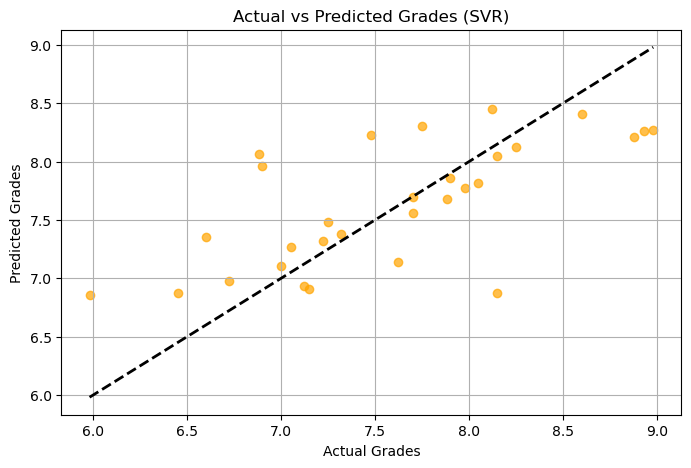

Mean Squared Error (MSE): 0.294
R² Score: 0.461


In [66]:
# Create an instance of the Model class and load the dataset from "data.csv"
model_obj = Model("data.csv")

# Rename columns to standardized names (optional but helps avoid errors in column references)
model_obj.rename_columns()

# Define feature columns to be used for prediction
features = ["Stu_Hours", "Extra_Hours"]  # Study hours and extracurricular hours as features

# Define the target column we want to predict
target = "Grades"

# Split the dataset into training and testing sets using the specified features and target
model_obj.split_data(features, target)

# Train the Support Vector Regression (SVR) model on the training data
model_obj.train_svm_model()

# Predict the target values (Grades) for the test dataset
model_obj.predict()

# Plot actual vs predicted Grades and print model evaluation metrics (MSE and R² score)
model_obj.plot_predictions()



In [67]:
# Create an instance of the Model class and load the dataset from "data.csv"
model_obj = Model("data.csv")

# Rename columns to standardized names (optional but helps avoid errors in column references)
model_obj.rename_columns()

# Save the updated DataFrame to "data2.csv"
model_obj.df.to_csv("data2.csv", index=False)

# Define feature columns to be used for prediction
features = ["Stu_Hours", "Extra_Hours"]

# Define the target column we want to predict
target = "Grades"

# Split the dataset into training and testing sets
model_obj.split_data(features, target)

# Train the SVR model
model_obj.train_svm_model()

# Predict the target values (Grades)
model_obj.predict()


Data loaded successfully from: data.csv
Columns renamed successfully.
New columns: ['Std_ID', 'Stu_Hours', 'Extra_Hours', 'Sleep_Hours', 'Social_Hours_Per_Day', 'Physical_Hours', 'Stress_Level', 'Gender', 'Grades']
Data split successful.
Model training completed.
Prediction completed.


In [68]:
class Pickle(Model):
    """
    Pickle Class

    Extends Model class to add functionality for saving and loading the trained model
    using Python's pickle serialization.
    """

    def __init__(self, file_path=None):
        # Initialize the parent Model class (which itself inherits from DataPreprocessing)
        super().__init__(file_path)

    def store_model(self, file_path):
        """
        Save the current trained model to a file using pickle.

        Parameters:
            file_path (str): The destination filepath where the model will be saved.
        """
        if self.model is None:
            print("No model available to save.")  # Warn if no model is trained yet
            return
        try:
            # Open the file in write-binary mode and dump the model object
            with open(file_path, 'wb') as f:
                self.pickle.dump(self.model, f)
            print(f"Model saved successfully to {file_path}.")
        except Exception as e:
            # Catch and print any exceptions during file write or pickling
            print(f"Error saving model: {e}")

    def load_model(self, file_path):
        """
        Load a pickled model from a file.

        Parameters:
            file_path (str): The filepath from which the model will be loaded.
        """
        try:
            # Open the file in read-binary mode and load the model object
            with open(file_path, 'rb') as f:
                self.model = self.pickle.load(f)
            print(f"Model loaded successfully from {file_path}.")
        except Exception as e:
            # Catch and print any exceptions during file read or unpickling
            print(f"Error loading model: {e}")

    def predict_with_loaded_model(self, X):
        """
        Use the loaded model to make predictions on input data X.

        Parameters:
            X (array-like): Feature data for which predictions are to be made.

        Returns:
            numpy array or None: Predicted values if model is loaded; else None.
        """
        if self.model is None:
            print("No model loaded. Please load a model first.")  # Warn if no model loaded
            return None
        try:
            # Attempt to predict using the loaded model
            return self.model.predict(X)
        except Exception as e:
            # Catch and print prediction errors (e.g., wrong input shape)
            print(f"Prediction error: {e}")
            return None


In [69]:
# Create an instance of the Pickle class and load the dataset from "data.csv"
pickle_obj = Pickle("data.csv")

# Rename columns for consistency and to avoid errors when referencing column names
pickle_obj.rename_columns()

# Define the feature columns used for training the model
features = ["Stu_Hours", "Extra_Hours"]

# Define the target column that the model will learn to predict
target = "Grades"

# Split the dataset into training and testing subsets
pickle_obj.split_data(features, target)

# Train the Support Vector Regression (SVR) model on the training data
pickle_obj.train_svm_model()

# Generate predictions on the test set using the trained model
pickle_obj.predict()

# Save the trained model to a pickle file for later reuse
pickle_obj.store_model("svr_model.pkl")

# Load the saved model from the pickle file (can be done in a new Python session)
pickle_obj.load_model("svr_model.pkl")

# Use the loaded model to predict on the test dataset features
predictions = pickle_obj.predict_with_loaded_model(pickle_obj.X_test)

# Print the predictions made by the loaded model
print("Predictions with loaded model:", predictions)


Data loaded successfully from: data.csv
Columns renamed successfully.
New columns: ['Std_ID', 'Stu_Hours', 'Extra_Hours', 'Sleep_Hours', 'Social_Hours_Per_Day', 'Physical_Hours', 'Stress_Level', 'Gender', 'Grades']
Data split successful.
Model training completed.
Prediction completed.
Model saved successfully to svr_model.pkl.
Model loaded successfully from svr_model.pkl.
Predictions with loaded model: [7.32161076 7.85491536 8.06872537 8.04407762 8.40481855 6.86926068
 7.10674011 7.69575868 7.68039136 8.22437869 7.55693414 7.26932486
 6.87445126 7.96039496 7.37669428 6.85635884 6.90716023 6.97928439
 8.302611   6.93132981 8.45143849 7.77397334 7.3576138  7.47774398
 8.26255915 8.27200724 8.12877915 7.81409338 8.20926244 7.13737463]
